Amirreza Hosseini - Pasha Ahmadi

# Abstract:

# Outline:

import every datasets

In [43]:
#python version
import sys
print('Python: {}'.format(sys.version))

Python: 3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]


In [44]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Import Data

First of all to perform the analysis, we have to import the data:

In [45]:
#import data from csv file in current directory
Bank = pd.read_csv('./bank.csv', sep = ',')

In [46]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Data Exploration

After we imported the dataset, we have to look at the total number of rows in the dataset and analyze the number of missing values.

In [47]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Fortunately, there are no <b>missing values</b>. If there were missing values we will have to fill them with the median, mean or mode or easily remove them. We tend to use the median but in this scenario there is no need to fill any missing values. This will definitely make our job easier!

In [48]:
Bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


2) آزمایشات فاز آماده سازی داده ها

a) تشخیص داده های پرت (حداقل: مقایسه دو روش روی سه فیلد)

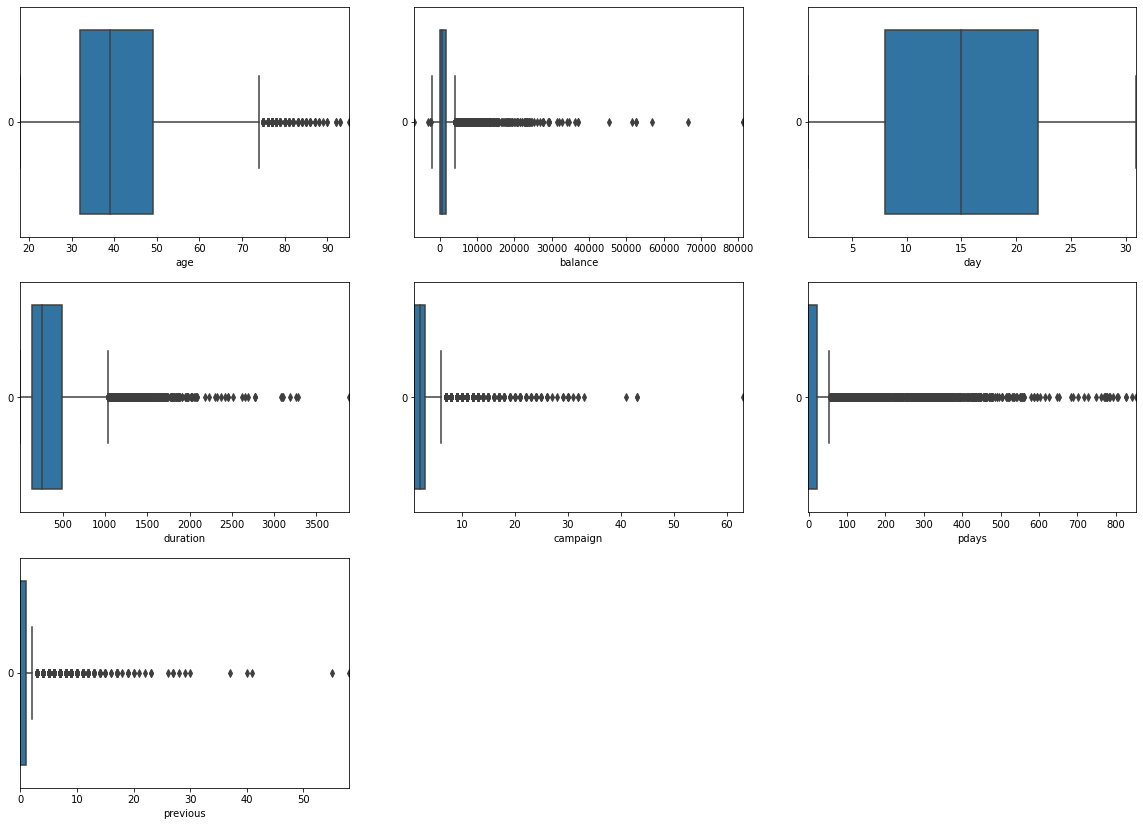

In [49]:
#boxplot on numerical features to find outliers
numerical_features = [feature for feature in Bank.columns if Bank[feature].dtypes != 'O']
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(Bank[numerical_feature], orient='h')
    #change x asxis range to min and to max of each feature
    plt.xlim(Bank[numerical_feature].min(), Bank[numerical_feature].max())
    plt.xlabel(numerical_feature)
    plotnumber+=1
    
plt.show()

C:\Users\Amir\AppData\Local\Temp\ipykernel_33168\3794251885.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bank[numerical_feature])
C:\Users\Amir\AppData\Local\Temp\ipykernel_33168\3794251885.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bank[numerical_feature])
C:\Users\Amir\AppData\

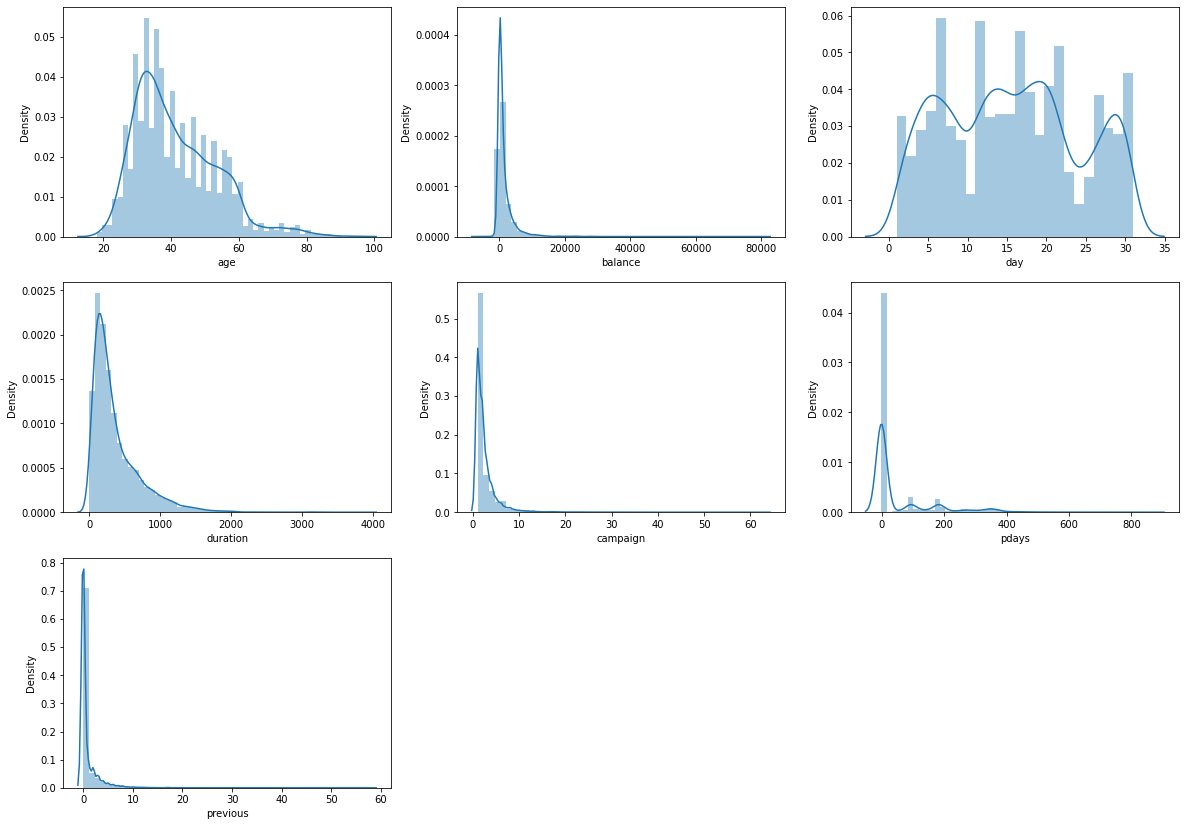

In [50]:
#displot on numerical features to find outliers
numerical_features = [feature for feature in Bank.columns if Bank[feature].dtypes != 'O']
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(Bank[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1 

plt.show()

In [51]:
from collections import Counter
def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        #1st quartile
        Q1 = np.percentile(data[c], 25)
        #3rd quartile
        Q3 = np.percentile(data[c],75)
        #IQR
        IQR = Q3 - Q1
        #Outlier step
        outlier_step = 0.5 * IQR
        #detect outlier and their indices
        outlier_list_col = data[(data[c] <= Q1 - outlier_step) | (data[c] >= Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [52]:
# detect outliers from Age, Balance, Day, Duration, Campaign, Pdays, Previous
Outliers_to_drop = detect_outliers(Bank,["age","balance","day","duration","campaign","pdays","previous"])
Bank.loc[Outliers_to_drop] # Show the outliers rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
148,59,retired,single,secondary,no,351,yes,no,unknown,27,may,1063,5,-1,0,unknown,yes
168,60,blue-collar,divorced,secondary,no,0,yes,no,unknown,29,may,1207,1,-1,0,unknown,yes
312,60,management,married,tertiary,no,3301,no,no,unknown,17,jun,2621,3,-1,0,unknown,yes
452,58,management,married,tertiary,no,3864,yes,no,cellular,15,jul,815,4,-1,0,unknown,yes
521,58,retired,married,unknown,no,9004,no,no,cellular,21,jul,891,4,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10873,50,blue-collar,married,primary,no,859,yes,yes,telephone,9,feb,56,5,196,7,failure,no
10938,53,blue-collar,single,secondary,no,1442,no,no,telephone,9,dec,137,8,188,2,other,no
11007,31,admin.,single,secondary,no,690,no,no,cellular,4,may,10,4,87,12,failure,no
11039,28,technician,single,secondary,no,3,no,no,telephone,18,may,40,8,349,6,failure,no


In [53]:
Bank_IQR = Bank.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [54]:
Bank_IQR.shape

(9848, 17)

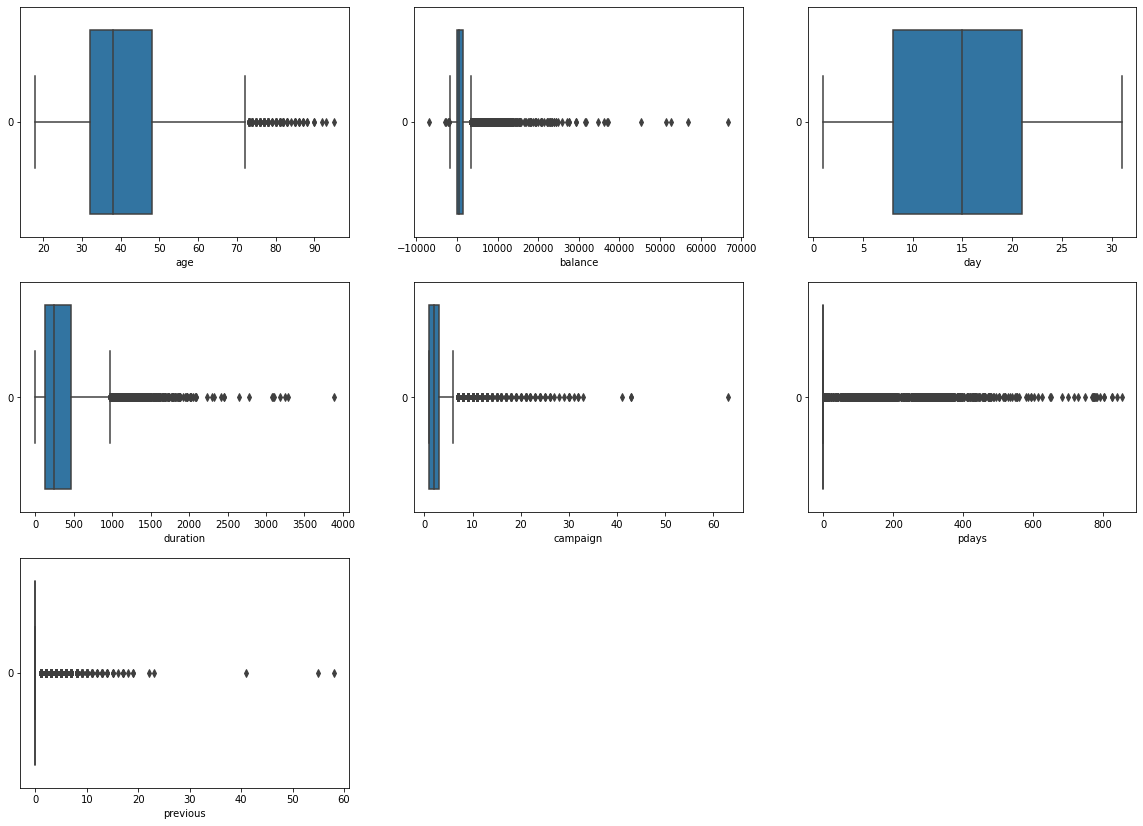

In [55]:
#plot the bars again to see the result
#boxplot on numerical features to find outliers
numerical_features = [feature for feature in Bank.columns if Bank[feature].dtypes != 'O']
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(Bank_IQR[numerical_feature], orient='h')
    plt.xlabel(numerical_feature)
    plotnumber+=1
    
plt.show()

In [56]:
#find z score for all numerical features
from scipy import stats
z = stats.zscore(Bank[numerical_features])
z

,age,balance,day,duration,campaign,pdays,previous
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.363260
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.363260
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.363260
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.363260
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.363260
...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,-0.331287,-0.554168,-0.481184,-0.363260
11158,-0.187357,-0.246658,0.040612,-0.832564,0.547981,-0.481184,-0.363260
11159,-0.774958,-0.464934,0.396891,-0.622258,-0.186785,-0.481184,-0.363260
11160,0.148416,-0.473926,-0.909466,-1.045752,-0.186785,1.109571,1.818332


In [57]:
#show records with z score > 3 as Query on bank dataset
Q = Bank[(z <-1).all(axis=1)]
Q

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [58]:
#find the records with z score < 3 and z score >-3 and remove them
Bank_z = Bank[(z < 3).all(axis=1) & (z >- 3).all(axis=1)]
Bank_z.shape

(10098, 17)

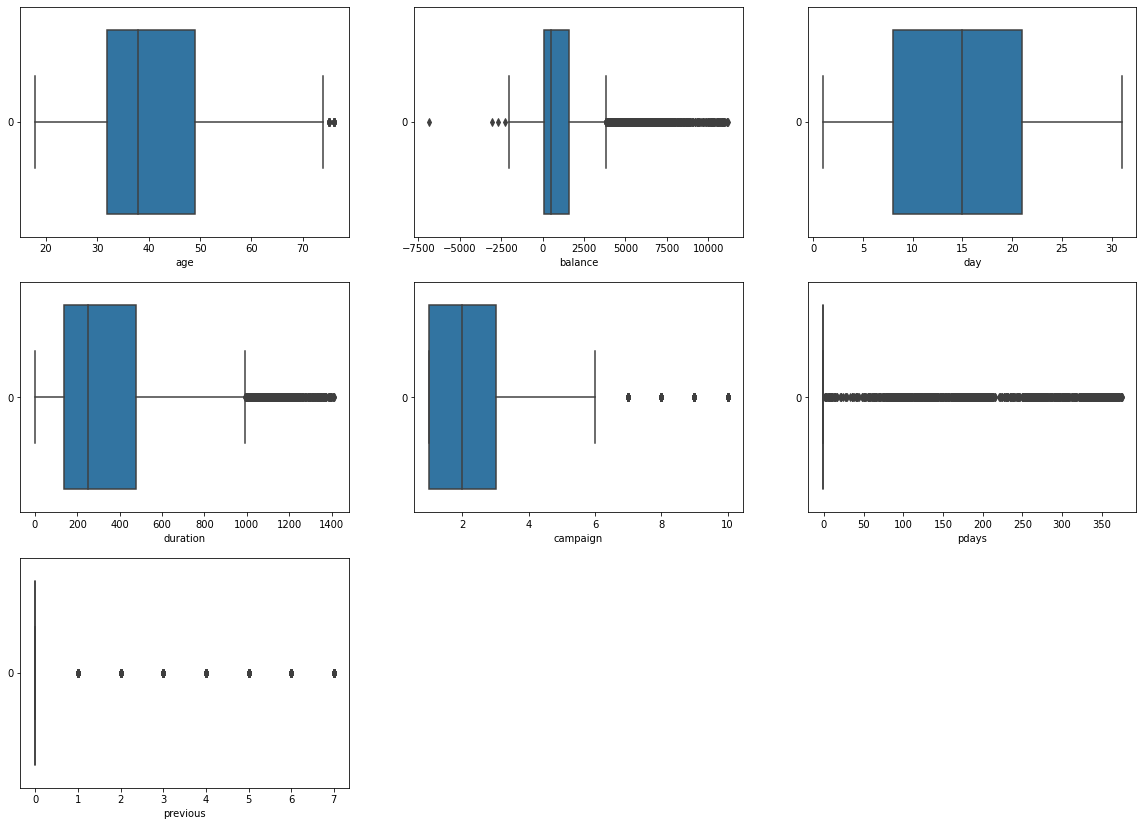

In [59]:
#plot the bars again to see the result
#boxplot on numerical features to find outliers
numerical_features = [feature for feature in Bank.columns if Bank[feature].dtypes != 'O']
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(Bank_z[numerical_feature], orient='h')
    plt.xlabel(numerical_feature)
    plotnumber+=1
    
plt.show()

C:\Users\Amir\AppData\Local\Temp\ipykernel_33168\3794251885.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bank[numerical_feature])
C:\Users\Amir\AppData\Local\Temp\ipykernel_33168\3794251885.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bank[numerical_feature])
C:\Users\Amir\AppData\

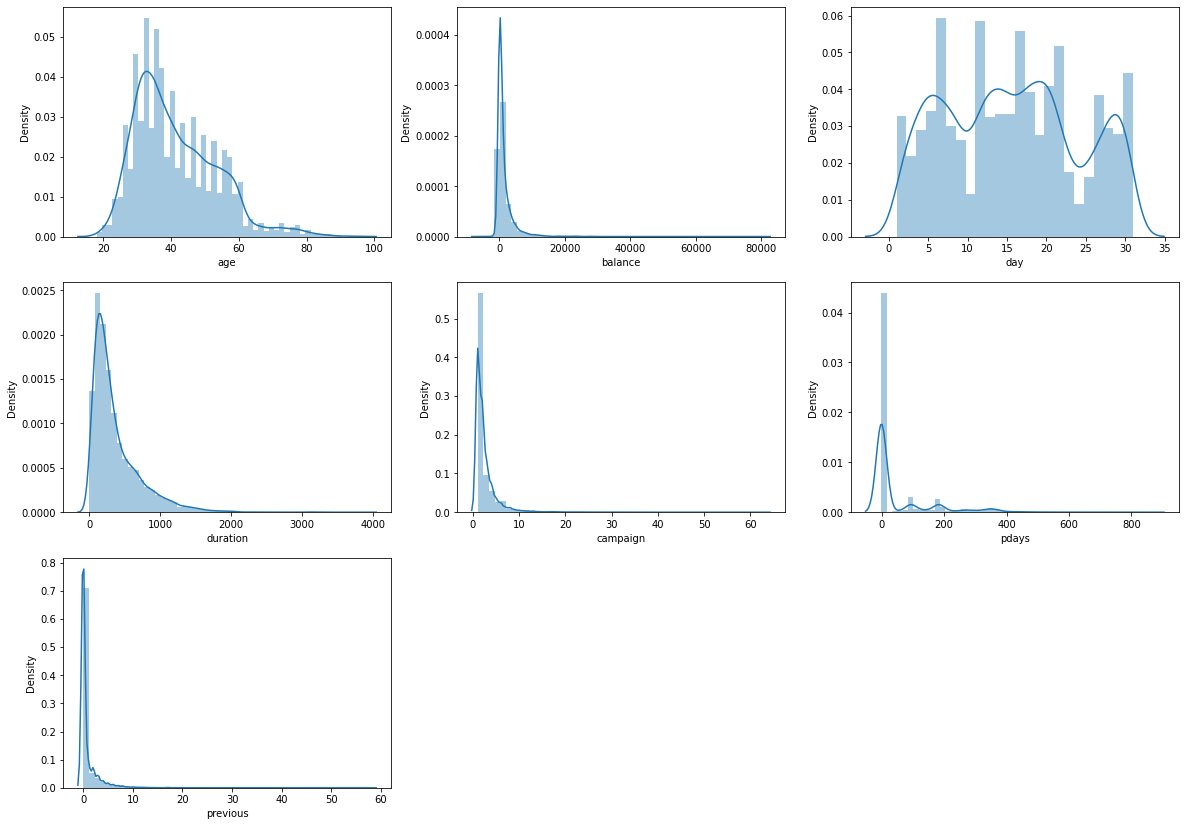

In [60]:
#displot on numerical features to find outliers
numerical_features = [feature for feature in Bank.columns if Bank[feature].dtypes != 'O']
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(Bank[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1 

plt.show()

choose Z-score way for rest

b) تبدیل و استاندارد سازی داده ها (با بیان دلایل انتخاب هر روش برای هر فیلد)

In [61]:
#see numerical features
numerical_features = [feature for feature in Bank.columns if Bank[feature].dtypes != 'O']
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [62]:
#keep the records of bank if they are in bank_z
Bank = Bank[Bank.index.isin(Bank_z.index)]

In [63]:
# #standardazion of numerical features to make mean is 0 and std is 1
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# Bank[numerical_features] = scaler.fit_transform(Bank[numerical_features])

In [64]:
#transforming of numerical features to make mean is 0 preprocessing.normalize
from sklearn import preprocessing
Bank[numerical_features] = preprocessing.normalize(Bank[numerical_features])

In [65]:
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.023002,admin.,married,secondary,no,0.913471,yes,no,unknown,0.001949,may,0.406247,0.000390,-0.000390,0.000000,unknown,yes
2,0.021779,technician,married,secondary,no,0.674623,yes,no,unknown,0.002656,may,0.737836,0.000531,-0.000531,0.000000,unknown,yes
3,0.021625,services,married,secondary,no,0.973501,yes,no,unknown,0.001966,may,0.227648,0.000393,-0.000393,0.000000,unknown,yes
4,0.077164,admin.,married,tertiary,no,0.262929,no,no,unknown,0.007145,may,0.961693,0.002858,-0.001429,0.000000,unknown,yes
5,0.074522,management,single,tertiary,no,0.000000,yes,yes,unknown,0.008872,may,0.997172,0.003549,-0.001774,0.000000,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.126979,blue-collar,single,primary,no,0.003848,yes,no,cellular,0.076957,apr,0.988893,0.003848,-0.003848,0.000000,unknown,no
11158,0.052781,services,married,secondary,no,0.992016,no,no,unknown,0.021654,jun,0.112329,0.005413,-0.001353,0.000000,unknown,no
11159,0.196326,technician,single,secondary,no,0.177921,no,no,cellular,0.116569,aug,0.957091,0.012270,-0.006135,0.000000,unknown,no
11160,0.241867,technician,married,secondary,no,0.000000,no,yes,cellular,0.044999,may,0.050623,0.011250,0.967468,0.028124,failure,no


In [66]:
Bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000
mean,0.082400,0.625426,0.032803,0.469997,0.004917,0.059751,0.000856
std,0.102692,0.467051,0.050018,0.344872,0.009621,0.162176,0.002582
min,0.002428,-0.999517,0.000120,0.000469,0.000089,-0.030686,0.000000
25%,0.023539,0.322301,0.006479,0.136616,0.000936,-0.002135,0.000000
50%,0.048029,0.863124,0.016313,0.407194,0.002200,-0.000871,0.000000
75%,0.098859,0.985655,0.037278,0.824195,0.005042,-0.000146,0.000000
max,0.969540,0.999988,0.596420,0.999771,0.186491,0.997325,0.042030


C:\Users\Amir\AppData\Local\Temp\ipykernel_33168\3615963663.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bank[numerical_feature])
C:\Users\Amir\AppData\Local\Temp\ipykernel_33168\3615963663.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Bank[numerical_feature])
C:\Users\Amir\AppData\

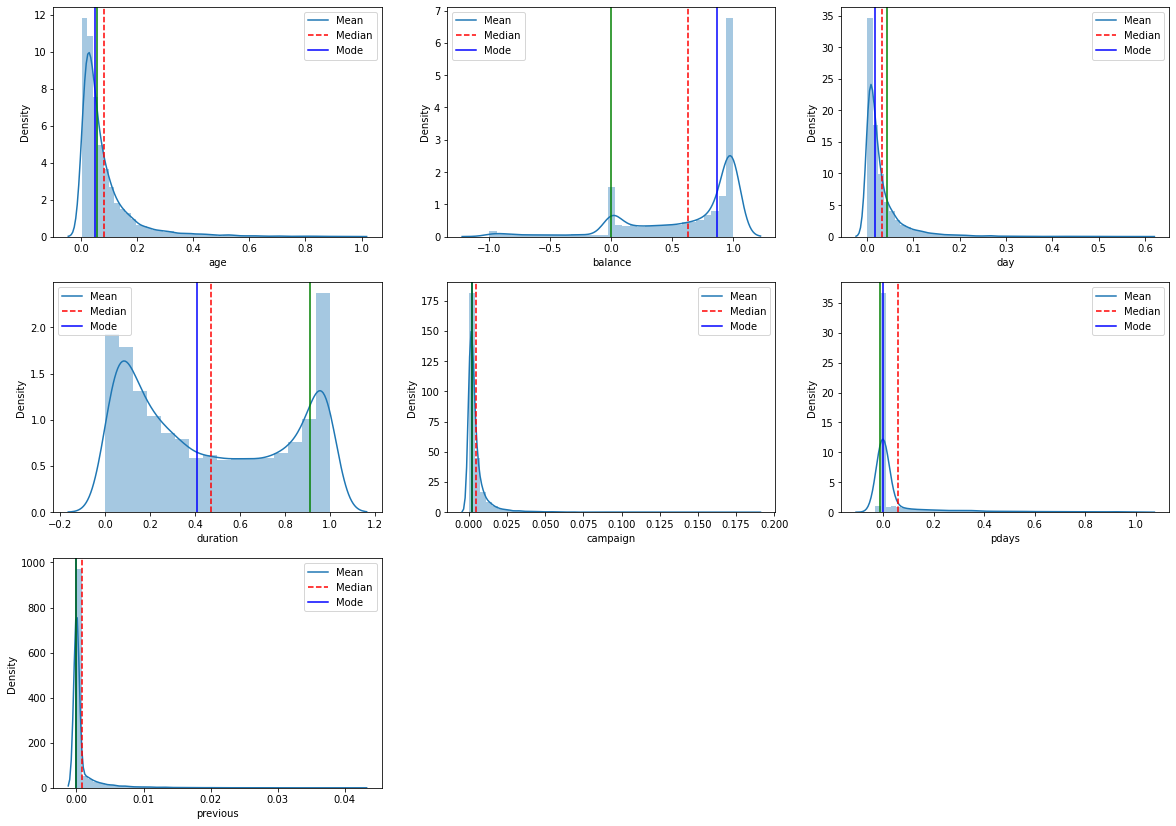

In [67]:
#displot on Bank    
numerical_features = [feature for feature in Bank.columns if Bank[feature].dtypes != 'O']
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(Bank[numerical_feature])
    plt.xlabel(numerical_feature)
    #show mean and mode and median
    plt.axvline(Bank[numerical_feature].mean(), color='r', linestyle='--')
    plt.axvline(Bank[numerical_feature].median(), color='b', linestyle='-')
    plt.axvline(Bank[numerical_feature].mode()[0], color='g', linestyle='-')
    #show legend
    plt.legend({'Mean':Bank[numerical_feature].mean(),'Median':Bank[numerical_feature].median(),'Mode':Bank[numerical_feature].mode()[0]})
    plotnumber+=1

plt.show()

c) دسته بندی مجدد (Reclassify) متغیرهای دسته¬ای

In [68]:
def cat_summary(dataframe, col_name, plot=False):
     print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                         "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
     if plot:
         sns.countplot(x=dataframe[col_name], data=dataframe)
         plt.xticks(rotation=90)
         plt.show(block=True)

                job      Ratio
management     2313  22.905526
blue-collar    1818  18.003565
technician     1655  16.389384
admin.         1213  12.012280
services        847   8.387800
retired         610   6.040800
self-employed   360   3.565062
student         333   3.297683
unemployed      325   3.218459
entrepreneur    305   3.020400
housemaid       259   2.564864
unknown          60   0.594177


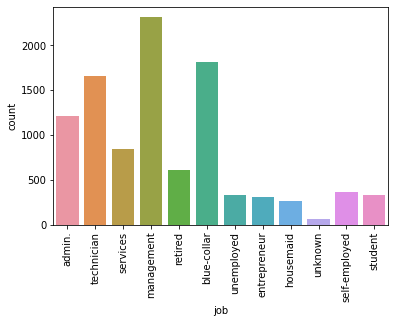

          marital      Ratio
married      5731  56.753813
single       3210  31.788473
divorced     1157  11.457714


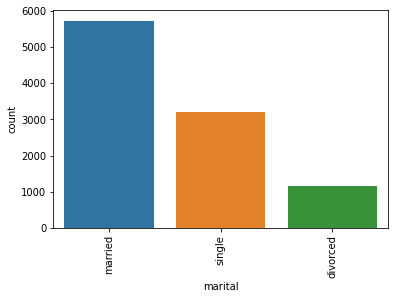

           education      Ratio
secondary       4990  49.415726
tertiary        3337  33.046148
primary         1331  13.180828
unknown          440   4.357298


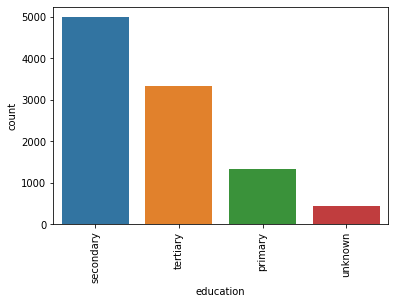

     default     Ratio
no      9942  98.45514
yes      156   1.54486


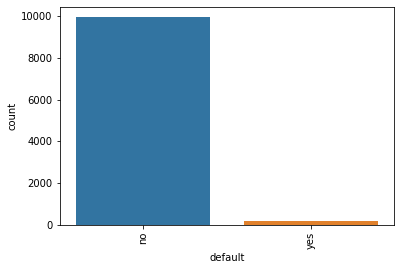

     housing      Ratio
no      5273  52.218261
yes     4825  47.781739


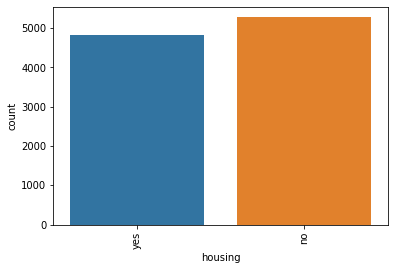

     loan      Ratio
no   8742  86.571598
yes  1356  13.428402


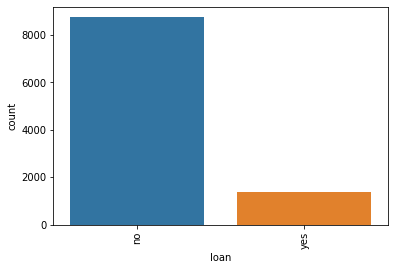

           contact      Ratio
cellular      7297  72.261834
unknown       2192  21.707269
telephone      609   6.030897


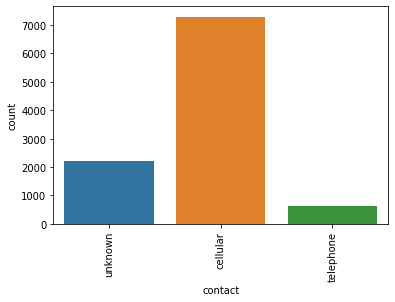

     month      Ratio
may   2657  26.312141
jul   1351  13.378887
aug   1327  13.141216
jun   1108  10.972470
nov    857   8.486829
apr    857   8.486829
feb    701   6.941969
oct    339   3.357100
jan    308   3.050109
sep    257   2.545058
mar    247   2.446029
dec     89   0.881363


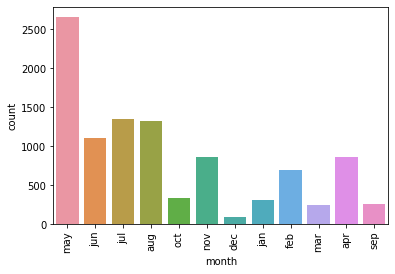

         poutcome      Ratio
unknown      7760  76.846900
failure      1026  10.160428
success       897   8.882947
other         415   4.109725


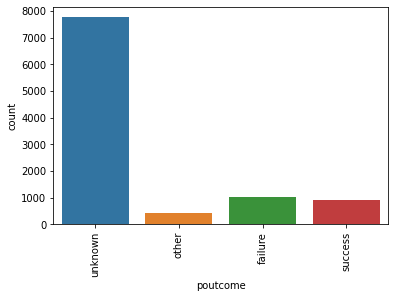

     deposit     Ratio
no      5493  54.39691
yes     4605  45.60309


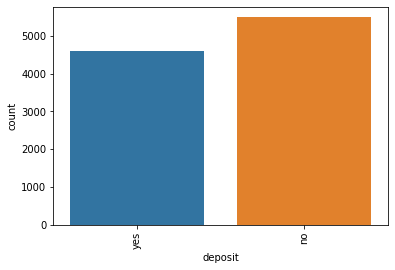

In [69]:
#plot all of the categorical features in Bank with their count and classes
categorical_features = [feature for feature in Bank.columns if Bank[feature].dtypes == 'O']
for i in categorical_features:
    cat_summary(Bank, i, plot=True)

Reclassify month feature

In [70]:
#Reclassify month feature using map function to season
season=Bank.copy()
season['month'] = Bank['month'].map({'jan':'winter', 'feb':'winter', 'mar':'spring', 'apr':'spring', 'may':'summer', 'jun':'summer', 'jul':'summer', 'aug':'summer', 'sep':'autumn', 'oct':'autumn', 'nov':'autumn', 'dec':'winter'})

        month      Ratio
summer   6443  63.804714
autumn   1453  14.388988
spring   1104  10.932858
winter   1098  10.873440


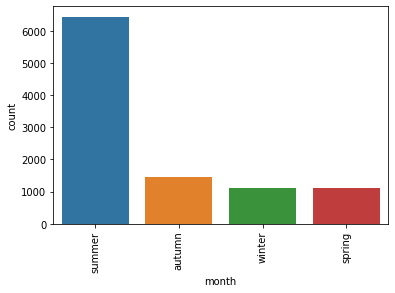

In [71]:
#cats of month feature
cat_summary(season, 'month', plot=True)

D) Binning numerical variables.

In [72]:
def cut_binning(x, n, labels):
  category1 = pd.cut(x,bins=n,labels=labels)

  return category1

In [73]:
def qcut_binning(x, n, labels):
  category2 = pd.qcut(x,q=n,labels=labels)
  return category2

In [86]:
import pandas as pd
import jenkspy

def natural_binning(x,n,labels):
    breaks = jenkspy.jenks_breaks(x, nb_class=n)
    category3 = pd.cut(x,bins=breaks,labels=labels)
    return category3

             age      Ratio
very young  9182  90.928897
young        667   6.605268
middle       178   1.762725
old           48   0.475342
very old      23   0.227768


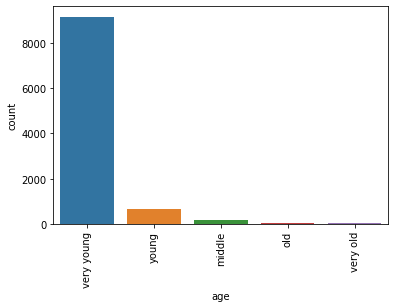

             age      Ratio
very young  2020  20.003961
middle      2020  20.003961
very old    2020  20.003961
young       2019  19.994058
old         2019  19.994058


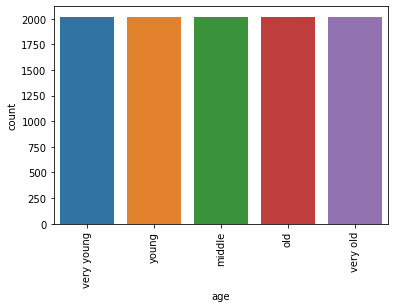

In [87]:
#binning 'Age' feature with cut method
numeric_cols=Bank.select_dtypes(include=['int','float']).columns.tolist()
cut=qcut=nb_cut=Bank.copy()
#Bank['balance']=cut_binning(Bank['balance'], 5, ['very low', 'low', 'middle', 'high', 'very high'])
cut['age'] = cut_binning(Bank['age'], 5, ['very young', 'young', 'middle', 'old', 'very old'])
cat_summary(cut, 'age', plot=True)
#binning 'Age' feature with qcut method()
qcut['age']=qcut_binning(Bank['age'], 5, ['very young', 'young', 'middle', 'old', 'very old'])
cat_summary(qcut, 'age', plot=True)
#binning 'Age' feature with natural_binning method()
# nb_cut['age']=natural_binning(Bank['age'], 5, ['very young', 'young', 'middle', 'old', 'very old'])
# cat_summary(nb_cut, 'age', plot=True)


3) آزمایشات فاز تحلیل اکتشافی داده ها (EDA)

a) بررسی و تحلیل روابط تک متغیره بین متغیرهای پیشبین و متغیر هدف

In [97]:
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.023002,admin.,married,secondary,no,0.913471,yes,no,unknown,0.001949,may,0.406247,0.000390,-0.000390,0.000000,unknown,yes
2,0.021779,technician,married,secondary,no,0.674623,yes,no,unknown,0.002656,may,0.737836,0.000531,-0.000531,0.000000,unknown,yes
3,0.021625,services,married,secondary,no,0.973501,yes,no,unknown,0.001966,may,0.227648,0.000393,-0.000393,0.000000,unknown,yes
4,0.077164,admin.,married,tertiary,no,0.262929,no,no,unknown,0.007145,may,0.961693,0.002858,-0.001429,0.000000,unknown,yes
5,0.074522,management,single,tertiary,no,0.000000,yes,yes,unknown,0.008872,may,0.997172,0.003549,-0.001774,0.000000,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.126979,blue-collar,single,primary,no,0.003848,yes,no,cellular,0.076957,apr,0.988893,0.003848,-0.003848,0.000000,unknown,no
11158,0.052781,services,married,secondary,no,0.992016,no,no,unknown,0.021654,jun,0.112329,0.005413,-0.001353,0.000000,unknown,no
11159,0.196326,technician,single,secondary,no,0.177921,no,no,cellular,0.116569,aug,0.957091,0.012270,-0.006135,0.000000,unknown,no
11160,0.241867,technician,married,secondary,no,0.000000,no,yes,cellular,0.044999,may,0.050623,0.011250,0.967468,0.028124,failure,no


In [98]:
#converts categorical columns to numeric format
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_features:
    Bank[i]=le.fit_transform(Bank[i])

In [99]:
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.023002,0,1,1,0,0.913471,1,0,2,0.001949,8,0.406247,0.000390,-0.000390,0.000000,3,1
2,0.021779,9,1,1,0,0.674623,1,0,2,0.002656,8,0.737836,0.000531,-0.000531,0.000000,3,1
3,0.021625,7,1,1,0,0.973501,1,0,2,0.001966,8,0.227648,0.000393,-0.000393,0.000000,3,1
4,0.077164,0,1,2,0,0.262929,0,0,2,0.007145,8,0.961693,0.002858,-0.001429,0.000000,3,1
5,0.074522,4,2,2,0,0.000000,1,1,2,0.008872,8,0.997172,0.003549,-0.001774,0.000000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.126979,1,2,0,0,0.003848,1,0,0,0.076957,0,0.988893,0.003848,-0.003848,0.000000,3,0
11158,0.052781,7,1,1,0,0.992016,0,0,2,0.021654,6,0.112329,0.005413,-0.001353,0.000000,3,0
11159,0.196326,9,2,1,0,0.177921,0,0,0,0.116569,1,0.957091,0.012270,-0.006135,0.000000,3,0
11160,0.241867,9,1,1,0,0.000000,0,1,0,0.044999,8,0.050623,0.011250,0.967468,0.028124,0,0


<AxesSubplot:>

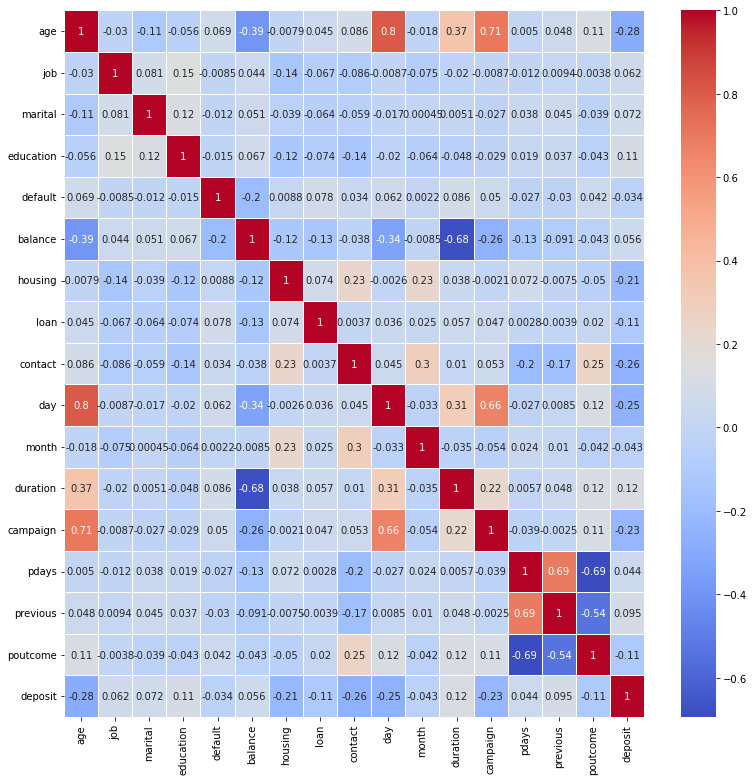

In [100]:
#Exploring the univariate relationships between predictors and the target variable.
#with corr in numpy and pearson method
correlations = Bank.corr(method='pearson')
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,13))         # Sample figsize in inches
sns.heatmap(correlations, annot=True, linewidths=.5, ax=ax, cmap='coolwarm')

C:\Users\Amir\AppData\Local\Temp\ipykernel_33168\3572320120.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(correlations)


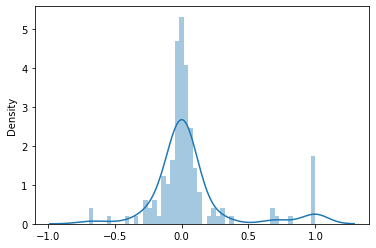

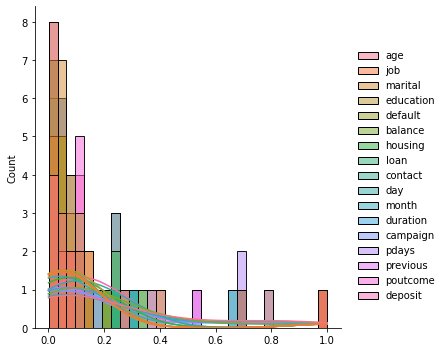

In [101]:
#plot the distrobutions of correlations with displot
sns.distplot(correlations)
sns.displot(abs(correlations), kde=True)

In [102]:
#Find features with maximum correlation with target
cor_target = abs(correlations['deposit'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

age          0.284029
education    0.105405
housing      0.213892
loan         0.108103
contact      0.256968
day          0.251060
duration     0.121964
campaign     0.230573
poutcome     0.106728
deposit      1.000000
Name: deposit, dtype: float64

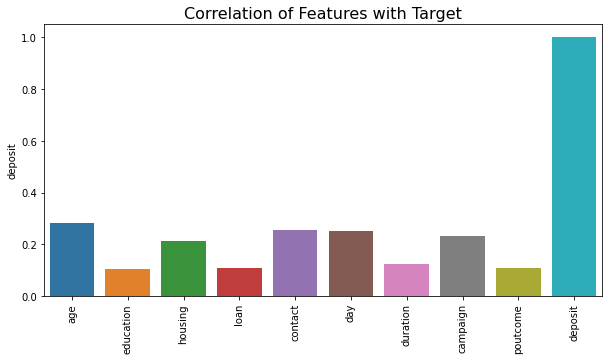

In [105]:
#plot the correlations of features with target with barplot
plt.figure(figsize=(10,5))
plt.title("Correlation of Features with Target",y=1,size=16)
sns.barplot(x=relevant_features.index, y=relevant_features)
plt.xticks(rotation=90)
plt.show()

# 4 setup phase

In [ ]:
#cross validation with train_test_split  
